In [22]:
from lsst.obs.lsstSim import LsstSimMapper
from lsst.sims.coordUtils import chipNameFromRaDec
from lsst.sims.utils import ObservationMetaData
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from lsst.sims.utils import angularSeparation

In [2]:
mapper = LsstSimMapper()
epoch=2000.

In [3]:
ra, dec = np.meshgrid(np.linspace(-2,2, 500), np.linspace(-2,2, 500))

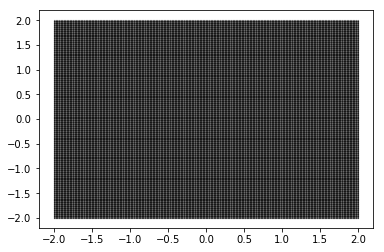

In [4]:
plt.plot(ra,dec, 'ko', markersize=.1);

In [5]:
obs_metadata = ObservationMetaData(pointingRA=np.degrees(0.),
                                                   pointingDec=np.degrees(0.),
                                                   rotSkyPos=np.degrees(0.),
                                                   mjd=53000)

In [6]:
chipNames = chipNameFromRaDec(ra.ravel(),dec.ravel(),epoch=epoch, camera=mapper.camera, obs_metadata=obs_metadata)

In [7]:
good = np.where((chipNames != [None]))
# Check for other bits
cng = np.array(chipNames[good], dtype='str')
find_char1 = np.char.find(cng, 'R:0,0')
find_char2 = np.char.find(cng, 'R:4,4')
find_char3 = np.char.find(cng, 'R:4,0')
find_char4 = np.char.find(cng, 'R:0,4')

good2 = np.where((find_char1 == -1) & (find_char2 == -1)
                & (find_char3 == -1) & (find_char4 == -1))
good = good[0][good2]
bad = np.where(chipNames == [None])

In [8]:
find_char3.max()

0

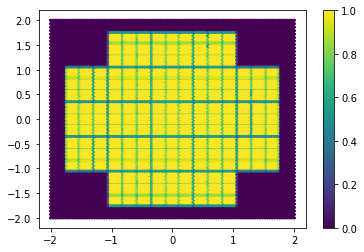

In [9]:
ack = ra.ravel()*0
ack[good] = 1
plt.hexbin(ra.ravel(), dec.ravel(), ack)
plt.colorbar()
#plt.plot(ra.ravel()[good], dec.ravel()[good], 'bo', markersize=.1, alpha=.5)
#plt.plot(ra.ravel()[bad], dec.ravel()[bad], 'ro', markersize=.1, alpha=.5)

In [10]:
good = np.where(chipNames != [None])
cngood = np.array(chipNames[good], dtype='str')
np.char.find(cngood, 'A')

array([-1, -1, -1, ..., -1, -1, -1])

In [11]:
np.size(np.unique(chipNames[good]))

205

In [12]:
np.unique(chipNames[good])

array(['R:0,0 S:1,2', 'R:0,0 S:2,1', 'R:0,0 S:2,2,A', 'R:0,0 S:2,2,B',
       'R:0,1 S:0,0', 'R:0,1 S:0,1', 'R:0,1 S:0,2', 'R:0,1 S:1,0',
       'R:0,1 S:1,1', 'R:0,1 S:1,2', 'R:0,1 S:2,0', 'R:0,1 S:2,1',
       'R:0,1 S:2,2', 'R:0,2 S:0,0', 'R:0,2 S:0,1', 'R:0,2 S:0,2',
       'R:0,2 S:1,0', 'R:0,2 S:1,1', 'R:0,2 S:1,2', 'R:0,2 S:2,0',
       'R:0,2 S:2,1', 'R:0,2 S:2,2', 'R:0,3 S:0,0', 'R:0,3 S:0,1',
       'R:0,3 S:0,2', 'R:0,3 S:1,0', 'R:0,3 S:1,1', 'R:0,3 S:1,2',
       'R:0,3 S:2,0', 'R:0,3 S:2,1', 'R:0,3 S:2,2', 'R:0,4 S:1,0',
       'R:0,4 S:2,0,A', 'R:0,4 S:2,0,B', 'R:0,4 S:2,1', 'R:1,0 S:0,0',
       'R:1,0 S:0,1', 'R:1,0 S:0,2', 'R:1,0 S:1,0', 'R:1,0 S:1,1',
       'R:1,0 S:1,2', 'R:1,0 S:2,0', 'R:1,0 S:2,1', 'R:1,0 S:2,2',
       'R:1,1 S:0,0', 'R:1,1 S:0,1', 'R:1,1 S:0,2', 'R:1,1 S:1,0',
       'R:1,1 S:1,1', 'R:1,1 S:1,2', 'R:1,1 S:2,0', 'R:1,1 S:2,1',
       'R:1,1 S:2,2', 'R:1,2 S:0,0', 'R:1,2 S:0,1', 'R:1,2 S:0,2',
       'R:1,2 S:1,0', 'R:1,2 S:1,1', 'R:1,2 S:1,2', 'R

In [23]:
radius = angularSeparation(0., 0., ra.ravel(), dec.ravel())

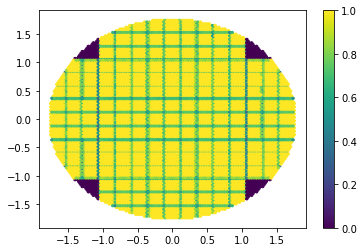

In [24]:
inner = np.where(radius < 1.75)[0]
plt.hexbin(ra.ravel()[inner], dec.ravel()[inner], ack[inner])
plt.colorbar()

In [25]:
np.mean(ack[inner])

0.88942025113545287